In [1]:
import pandas as pd
import numpy as np
import ipaddress
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from functions import *

In [2]:
# Convert features into One Hot Encoded
def hot_encode(data, columns):
    # Select the categorical columns to be one-hot encoded
    categorical_cols = columns

    # Extract the categorical data
    X_categorical = data[categorical_cols]

    # Create an instance of the OneHotEncoder
    encoder = OneHotEncoder(sparse_output=False)

    # Fit and transform the categorical data
    X_encoded = encoder.fit_transform(X_categorical)

    # Create a DataFrame with the encoded features
    encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

    # Concatenate the encoded features with the original dataset
    encoded_data = pd.concat([data.drop(categorical_cols, axis=1), encoded_df], axis=1)

    # Convert dictionary to dataframe
    df_out = pd.DataFrame.from_dict(encoded_data)
    
    return df_out

In [3]:
# import data
data_file = 'ml_dataset_2.csv'
# data_file = 'ml_dataset_nooutlier_1.csv'
target_column = 'packet_interval'

data = pd.read_csv(data_file)

# Extract the feature matrix (X) and the target variable (y)
X = data.drop(target_column, axis=1)
y = data[target_column]

# Hot Encode Dataset
# X = hot_encode(X, ['source_ip', 'destination_ip', 'source_mac', 'destination_mac', 'protocol'])

print(X.shape)
print(y.shape)

(3914, 5)
(3914,)


In [4]:
# Select the categorical columns to be one-hot encoded
categorical_cols = ['source_ip', 'destination_ip', 'source_mac', 'destination_mac', 'protocol']

# Extract the categorical data
X_categorical = X[categorical_cols]

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse_output = False)

# Fit and transform the categorical data
X_encoded = encoder.fit_transform(X_categorical)

print(X_encoded.shape)
# # Create a DataFrame with the encoded features
# encoded_df = pd.DataFrame(X_encoded, columns = encoder.get_feature_names_out(categorical_cols))

# # Concatenate the encoded features with the original dataset
# encoded_data = pd.concat([data.drop(categorical_cols, axis=1), encoded_df], axis=1)

# # Convert dictionary to dataframe
# df_out = pd.DataFrame.from_dict(encoded_data)

(3914, 3478)


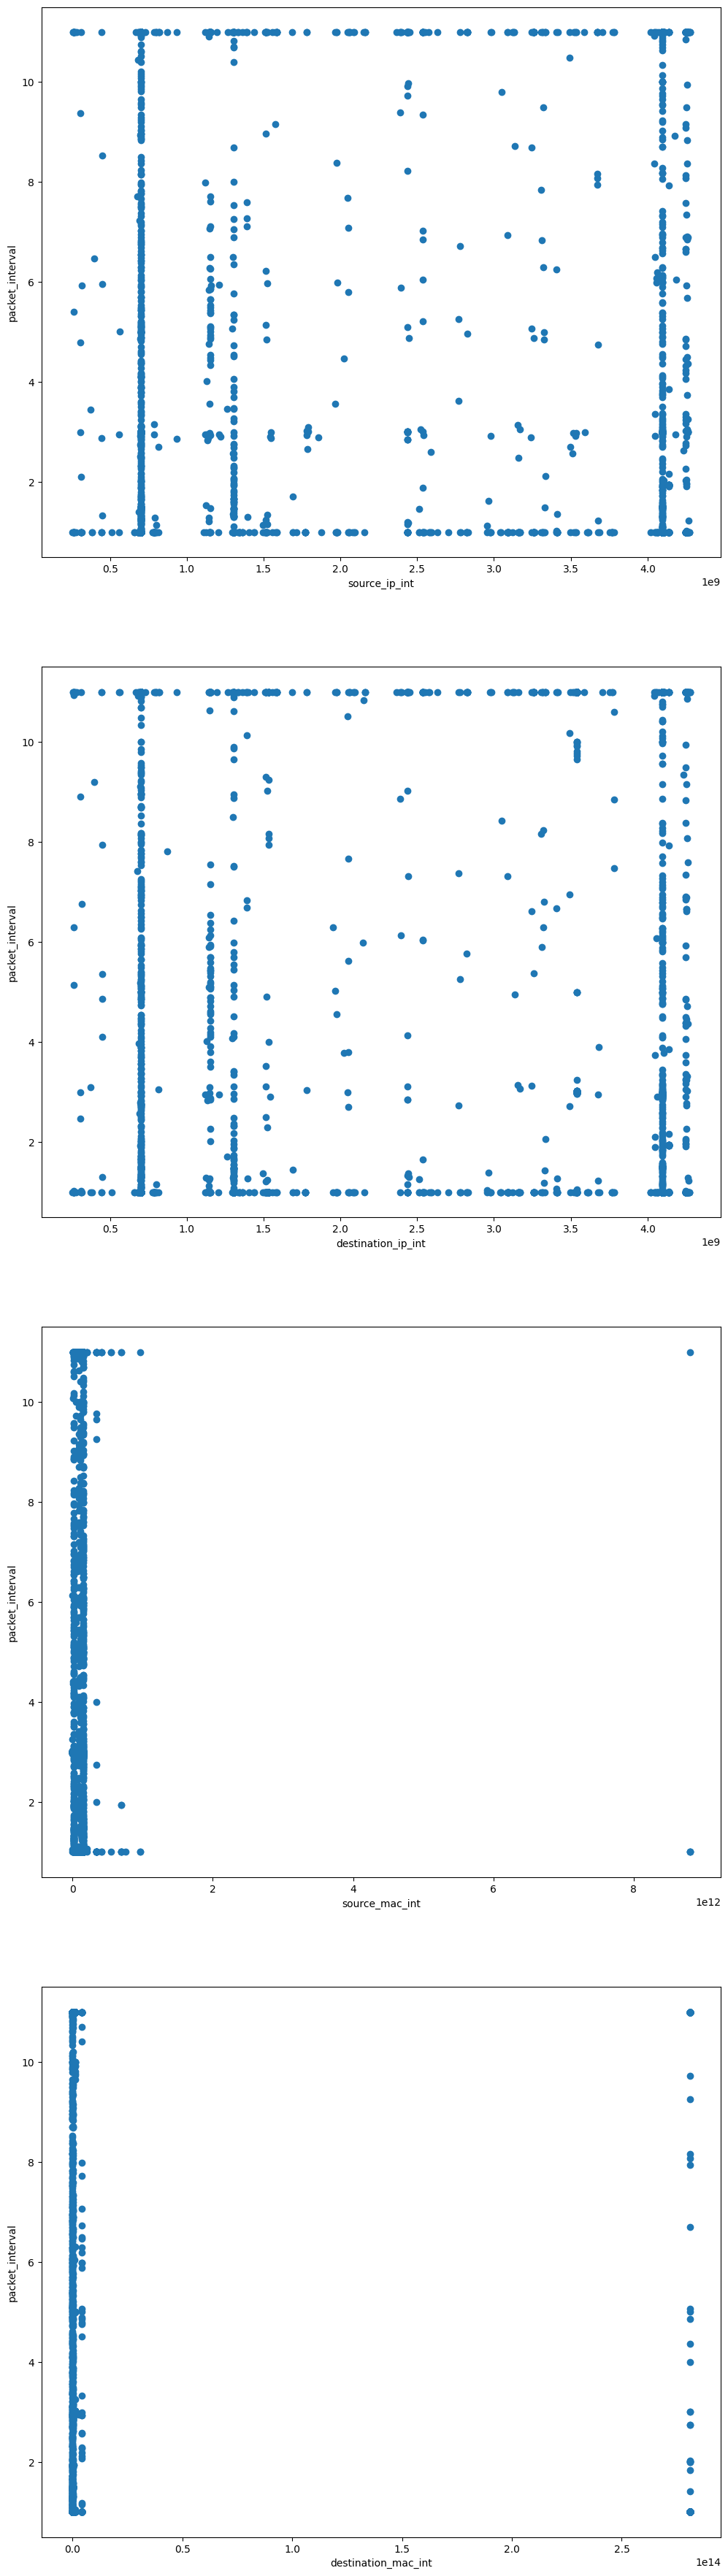

In [31]:
# Data visualization
fig, ax = plt.subplots(len(X.columns), figsize = (12, 45))

for i, column in enumerate(X):
    ax[i].set_xlabel(column)
    ax[i].set_ylabel(target_column)
#     ax[i].set_title(column + ' - Flow Duration')

    ax[i].scatter(X[column], y)

In [5]:
# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [6]:
# Data Normalization
scaler = StandardScaler()

# Fit the scaler on the training set and transform the training set
X_train_normalized = scaler.fit_transform(X_train)

# Transform the test set using the fitted scaler
X_test_normalized = scaler.transform(X_test)

<b>Hyperparameters of Decision Tree</b>

<p>criterion: This hyperparameter determines the quality of a split at each node. The two most common options are "gini" and "entropy." "Gini" refers to the Gini impurity, a measure of node impurity based on the probability of incorrectly classifying a randomly chosen element, while "entropy" refers to the information gain, a measure based on the entropy of the node's class distribution.

max_depth: This hyperparameter sets the maximum depth of the decision tree. It limits the number of nodes from the root to the farthest leaf. A deeper tree can learn more complex patterns but may also be prone to overfitting.

min_samples_split: This hyperparameter specifies the minimum number of samples required to split an internal node. If the number of samples at a node is less than this value, no further splitting will occur, effectively creating a leaf node.

min_samples_leaf: This hyperparameter sets the minimum number of samples required to be at a leaf node. If a split would result in a leaf node with fewer samples than this value, the split is not performed, and the node becomes a leaf instead.

max_features: This hyperparameter controls the number of features to consider when looking for the best split at each node. It can be an integer (representing a fixed number of features) or a float (representing a fraction of the total number of features).

max_leaf_nodes: This hyperparameter limits the maximum number of leaf nodes in the decision tree. Setting this parameter can help avoid overfitting and can be useful when there is a desire to limit the complexity of the tree.

min_impurity_decrease: This hyperparameter specifies a threshold for the impurity decrease required to split a node. A split will only be performed if the impurity decrease is above this threshold.

class_weight: This hyperparameter assigns weights to the classes to address class imbalance. It can be used to give more importance to minority classes or to adjust for imbalanced datasets.</p>

In [7]:
# Finding best Hyperparameter values
param_grid = {'max_depth': [1, 2, 3, 4, 5], 'min_samples_split':[2, 3, 4]}
model = DecisionTreeRegressor(random_state = 0)

grid_search = GridSearchCV(model, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']

# Create model with the best values of hyperparameters
model = DecisionTreeRegressor(max_depth = best_max_depth, min_samples_split = best_min_samples_split)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the values for test set 
y_pred = model.predict(X_test)

In [8]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred, squared = False)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

cross_val_score(model, X_train, y_train, cv=10)

Mean Squared Error: 4.478650596320776
R2 Score: 0.03325854859717847


array([0.06148861, 0.06799391, 0.0657023 , 0.00922352, 0.02887533,
       0.04648325, 0.03149043, 0.08503013, 0.07288302, 0.04775084])

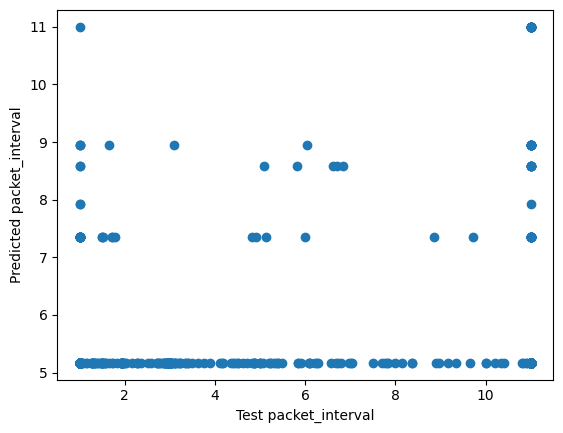

In [9]:
fig, ax = plt.subplots()
ax.set_xlabel('Test ' + target_column)
ax.set_ylabel('Predicted ' + target_column)
ax.scatter(y_test, y_pred)

In [11]:
packet_received = {
    'source_ip': ['41.177.117.184'],
    'destination_ip': ['41.177.3.224'],
    'source_mac': ['00:24:97:30:1d:00'],
    'destination_mac': ['00:02:55:53:a0:10'],
    'protocol': [6],
    }

# # encode ip addresses
# packet_received['source_ip_int'][0] = encode_ip(packet_received['source_ip_int'][0])
# packet_received['destination_ip_int'][0] = encode_ip(packet_received['destination_ip_int'][0])

# # encode mac addresses
# packet_received['source_mac_int'][0] = encode_mac(packet_received['source_mac_int'][0])
# packet_received['destination_mac_int'][0] = encode_mac(packet_received['destination_mac_int'][0])

# convert dictionary to dataframe
packet_data = pd.DataFrame.from_dict(packet_received)
X_encoded = encoder.transform(packet_data)
my_prediction = model.predict(X_encoded)
# try:
#     # Transform the categorical data
#     X_encoded = encoder.transform(packet_data)

#     my_prediction = model.predict(x_encoded)
# except:
#     my_prediction = 1
    
print(my_prediction)

[5.16921039]


In [12]:
# Export the one hot encoded features and respective predicted output
data = pd.read_csv('ml_dataset_2.csv')
data = data.drop('packet_interval', axis = 1)
X_encoded = encoder.transform(data)

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(X_encoded, columns = encoder.get_feature_names_out(categorical_cols))

# Concatenate the encoded features with the original dataset
encoded_data = pd.concat([data.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Convert dictionary to dataframe
df_out = pd.DataFrame.from_dict(encoded_data)
df_out.to_csv('X_encoded.csv')

my_prediction = model.predict(X_encoded)

df = pd.DataFrame({'timeout': my_prediction})
df.to_csv('timeout.csv')

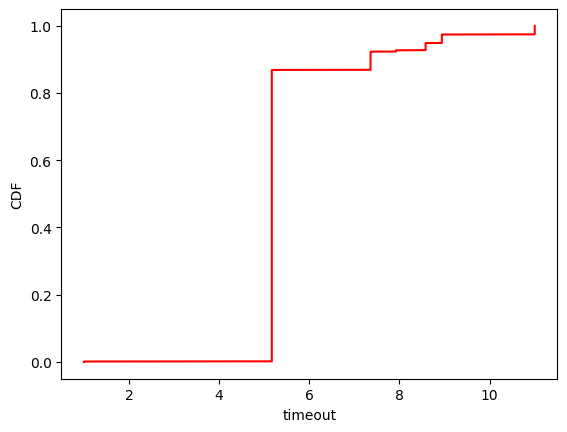

In [10]:
# Visualize the output distribution
data = pd.read_csv('timeout.csv')
x_column = 'timeout'
y_column = 'CDF'

fg, ax = plt.subplots()
ax.set_xlabel(x_column)
ax.set_ylabel(y_column)

# ax.set_ylim([0.4, 1])
# ax.set_xlim([0, 60])

x = sorted(data[x_column])
records_count = len(x)
y = np.arange(records_count) / float(records_count)

ax.plot(x, y, marker = '', color='r')